## Data Visualization

In [5]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import plotly.express as px

In [15]:
mmg_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\merged_food_insecurity_2010_2022.csv" 

In [16]:
mmg_data = pd.read_csv(mmg_file)

In [18]:
mmg_data.columns

Index(['high_threshold_in_state', 'per_fi_less_or_equal_to_low_threshold',
       'county_name', 'food_insecurity_rate',
       'per_fi_children_hh_income_above_185_fpl', 'fips', 'low_threshold_type',
       'num_of_food_insecure_persons', 'cost_per_meal',
       'child_food_insecurity_rate', 'num_of_food_insecure_children',
       'high_threshold_type', 'per_fi_children_hh_income_below_185_fpl',
       'state_name_raw', 'low_threshold_in_state', 'state_name',
       'weighted_annual_shortfall', 'per_fi_btwn_thresholds',
       'per_fi_greater_high_threshold', 'year'],
      dtype='object')

In [29]:
mmg_avg_places_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data viz\county_avg_places_final_data.csv"
mmg_avg_places_data = pd.read_csv(mmg_avg_places_file)
mmg_avg_places_data['fips'] = mmg_avg_places_data['fips'].astype(str).str.zfill(5)

In [30]:
mmg_avg_places_data.columns

Index(['fips', 'state_name', 'county_name', 'shortfall_avg_2010_2022',
       'food_insecurity_rate_avg_2010_2022', 'cost_per_meal_avg_2010_2022',
       'shortfall_per_capita_avg_2010_2022', 'num_food_insecure_avg_2010_2022',
       'child_fi_rate_avg_2010_2022',
       'per_less_low_threshold_fi_avg_2010_2022',
       'per_above_hight_threshold_fi_avg_2010_2022',
       'population_avg_2010_2018', 'diabetes_prevalence',
       'obesity_prevalence'],
      dtype='object')

In [40]:
mmg_avg_places_data.dtypes

fips                                           object
state_name                                     object
county_name                                    object
shortfall_avg_2010_2022                       float64
food_insecurity_rate_avg_2010_2022            float64
cost_per_meal_avg_2010_2022                   float64
shortfall_per_capita_avg_2010_2022            float64
num_food_insecure_avg_2010_2022               float64
child_fi_rate_avg_2010_2022                   float64
per_less_low_threshold_fi_avg_2010_2022       float64
per_above_hight_threshold_fi_avg_2010_2022    float64
population_avg_2010_2018                      float64
diabetes_prevalence                           float64
obesity_prevalence                            float64
dtype: object

In [21]:
census_additional_file = r"C:\Users\User\Desktop\UVM_Course\Data_Science_I\Project\SNAP-Diabetes-prevalance\data processing\date_cleaned\all_merged_new.csv"
census_additional_data = pd.read_csv(census_additional_file)
census_additional_data.columns

C:\Users\User\AppData\Local\Temp\ipykernel_16644\4123330507.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  census_additional_data = pd.read_csv(census_additional_file)


Index(['high_threshold_in_state', 'per_fi_less_or_equal_to_low_threshold',
       'county_name_x', 'food_insecurity_rate',
       'per_fi_children_hh_income_above_185_fpl', 'fips', 'low_threshold_type',
       'num_of_food_insecure_persons', 'cost_per_meal',
       'child_food_insecurity_rate', 'num_of_food_insecure_children',
       'high_threshold_type', 'per_fi_children_hh_income_below_185_fpl',
       'state_name_raw', 'low_threshold_in_state', 'state_name',
       'weighted_annual_shortfall', 'per_fi_btwn_thresholds',
       'per_fi_greater_high_threshold', 'year', 'diabetes_rate',
       'obesity_rate', 'county_name_y', 'estimate_total_households',
       'median_household_income', 'percent_families_wo_employment',
       'per_hs_grad', 'per_col_grad', 'percent_white_only', 'percent_over65'],
      dtype='object')

In [90]:
census_additional_data['fips']= census_additional_data['fips'].astype(str).str.zfill(5)
census_additional_data_no_dup = census_additional_data.drop_duplicates(subset='fips').copy()
# Standardize the median_household_income column
## Covert string to numeric 
census_additional_data_no_dup['median_household_income'] = pd.to_numeric(census_additional_data_no_dup['median_household_income'], errors='coerce'
) 
## Apply z-score distribution 
median_inc_mean = census_additional_data_no_dup['median_household_income'].mean()
median_inc_sigma = census_additional_data_no_dup['median_household_income'].std()
## Add new variable to census data 
census_additional_data_no_dup['median_inc_standardized'] = (census_additional_data_no_dup['median_household_income'] - median_inc_mean)/ median_inc_sigma

In [91]:
census_additional_data_no_dup.head()

,high_threshold_in_state,per_fi_less_or_equal_to_low_threshold,county_name_x,food_insecurity_rate,per_fi_children_hh_income_above_185_fpl,fips,low_threshold_type,num_of_food_insecure_persons,cost_per_meal,child_food_insecurity_rate,...,obesity_rate,county_name_y,estimate_total_households,median_household_income,percent_families_wo_employment,per_hs_grad,per_col_grad,percent_white_only,percent_over65,median_inc_standardized
0,1.85,0.327,autauga county,0.134,0.49,01001,snap,7140.0,2.58,0.203,...,0.384,"Autauga County, Alabama",22308,68315.0,17.9,90.4,29.6,74.4,15.6,0.297448
12,1.85,0.347,baldwin county,0.134,0.41,01003,snap,23570.0,2.64,0.238,...,0.368,"Baldwin County, Alabama",90802,71039.0,20.3,91.6,32.6,84.0,21.2,0.459397
25,1.85,0.479,barbour county,0.232,0.13,01005,snap,6440.0,2.53,0.258,...,0.438,"Barbour County, Alabama",9016,39712.0,26.2,76.5,11.9,45.5,19.8,-1.403081
38,1.85,0.358,bibb county,0.157,0.36,01007,snap,3550.0,2.55,0.249,...,0.414,"Bibb County, Alabama",7216,50669.0,22.5,78.9,10.9,75.8,16.8,-0.751657
51,1.85,0.410,blount county,0.126,0.47,01009,snap,7160.0,2.50,0.254,...,0.373,"Blount County, Alabama",21626,57440.0,20.1,81.8,14.7,91.3,18.3,-0.349102


In [92]:
census_additional_data_no_dup = census_additional_data_no_dup[['fips', 'estimate_total_households', 'median_inc_standardized', 'percent_families_wo_employment','per_hs_grad', 'per_col_grad', 'percent_white_only', 'percent_over65']]

In [45]:
import plotly.express as px
from plotly.subplots import make_subplots
def create_county_choropleth(df, color_column, title):
    upper_bound = df[color_column].quantile(0.99)
    fig = px.choropleth(
        df, 
        geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
        locations='fips', 
        color=color_column, 
        color_continuous_scale="Oranges", 
        range_color=(0, upper_bound),
        #range_color=(df[color_column].min(), df[color_column].max()),
        scope="usa",
        hover_name='county_name', # Show county name on hover
        hover_data={
            'fips': True, 
            color_column: ':.2s', # prevalence as a percentage
            #'shortfall_per_capita_avg_2010_2022': ':.0f' # shortfall
        },
        title=title,
        height=600
    )
    
    fig.update_layout(
        margin={"r":0,"t":40,"l":0,"b":0},
        coloraxis_colorbar=dict(title=color_column.replace('_', ' ').title())
    )
    fig.show()

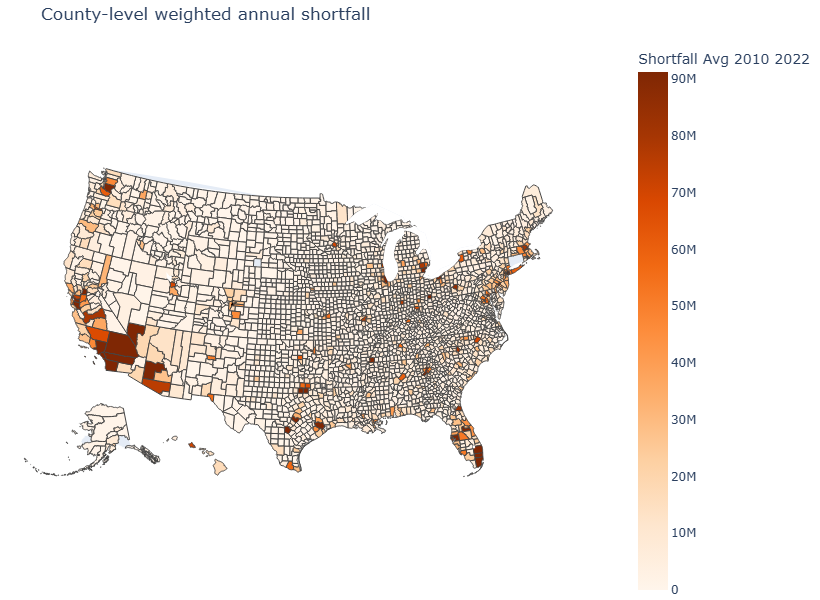

In [46]:
create_county_choropleth(
    mmg_avg_places_data, 
    'shortfall_avg_2010_2022', 
    'County-level weighted annual shortfall'
)

+ Check whether deep county have high diabetes and obesity?
+ 

In [55]:
def create_scatterplot(df):
    x_col= 'obesity_prevalence'
    y_col= 'diabetes_prevalence'
    color_col = 'shortfall_per_capita_avg_2010_2022'
    plot_data = df[[x_col, y_col, color_col]].dropna()
    plt.figure(figsize=(9, 7))

    #Create the scatter plot
    scatter = plt.scatter(
        plot_data[x_col],
        plot_data[y_col],
        c=plot_data[color_col], # Use shortfall for color intensity
        cmap='Reds', 
        alpha=0.6,
        s=30, 
        edgecolors='w',
        linewidths=0.5
    )

    # Add colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Shortfall per capita (USD)')

    # 5. Add labels and title
    plt.xlabel(f'County obesity prevalence (2022)')
    plt.ylabel(f'County diabetes prevalence (2022)')
    plt.title('Level-county scatterplot of diabetes and obesity')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

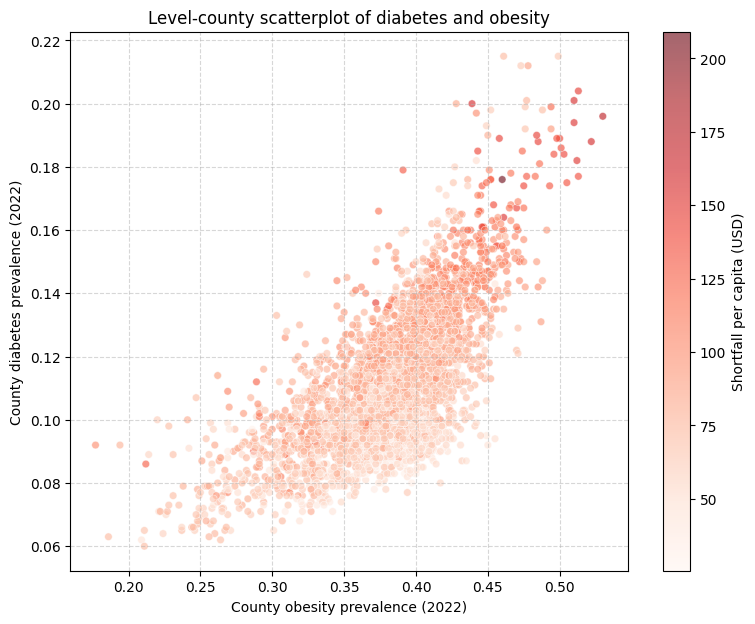

In [56]:
create_scatterplot(mmg_avg_places_data)

## Second plot: Ridge plot () and Hexbin (Control - outcome) 

In [59]:
mmg_avg_places_data.dtypes

fips                                           object
state_name                                     object
county_name                                    object
shortfall_avg_2010_2022                       float64
food_insecurity_rate_avg_2010_2022            float64
cost_per_meal_avg_2010_2022                   float64
shortfall_per_capita_avg_2010_2022            float64
num_food_insecure_avg_2010_2022               float64
child_fi_rate_avg_2010_2022                   float64
per_less_low_threshold_fi_avg_2010_2022       float64
per_above_hight_threshold_fi_avg_2010_2022    float64
population_avg_2010_2018                      float64
diabetes_prevalence                           float64
obesity_prevalence                            float64
dtype: object

In [64]:
df_test = mmg_avg_places_data.copy()

df_test['Diabetes_group'] = pd.qcut(
    df_test['diabetes_prevalence'], 
    q=3,
    labels = ['Low', 'Middle', 'High'],
    duplicates='drop'
)

df_test['Obesity_group'] = pd.qcut(
    df_test['obesity_prevalence'], 
    q=3,
    labels = ['Low', 'Middle', 'High'],
    duplicates='drop'
)

C:\Users\User\AppData\Local\Temp\ipykernel_16644\4109240368.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



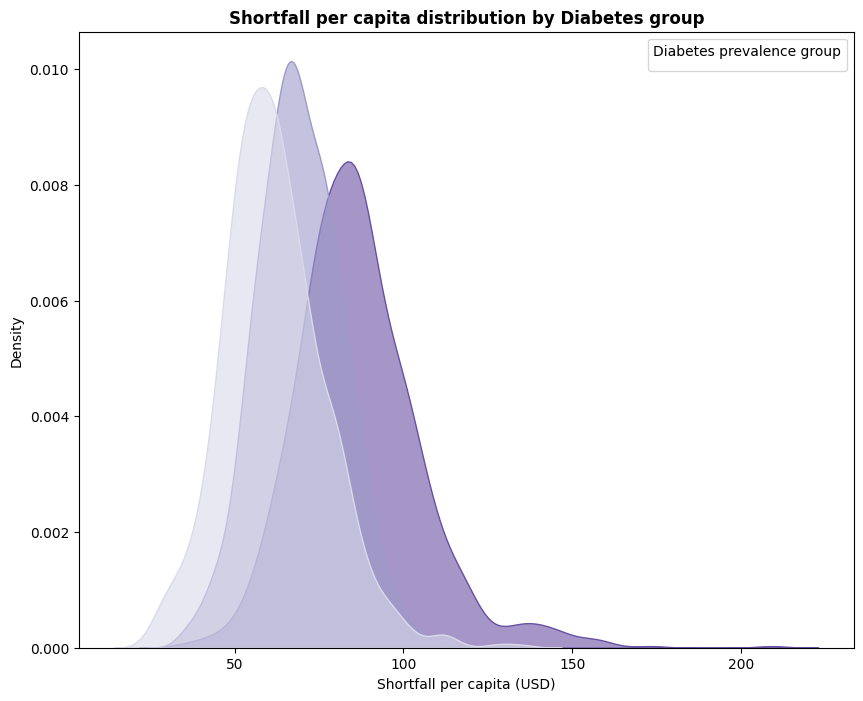

In [63]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df_test,
    x='shortfall_per_capita_avg_2010_2022',
    hue='Diabetes_group',
    fill=True,
    alpha=0.6,
    palette="Purples"
)
plt.title('Shortfall per capita distribution by Diabetes group', fontweight='bold')
plt.xlabel('Shortfall per capita (USD)')
plt.ylabel('Density')
plt.legend(title='Diabetes prevalence group')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_16644\3400144689.py:13: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



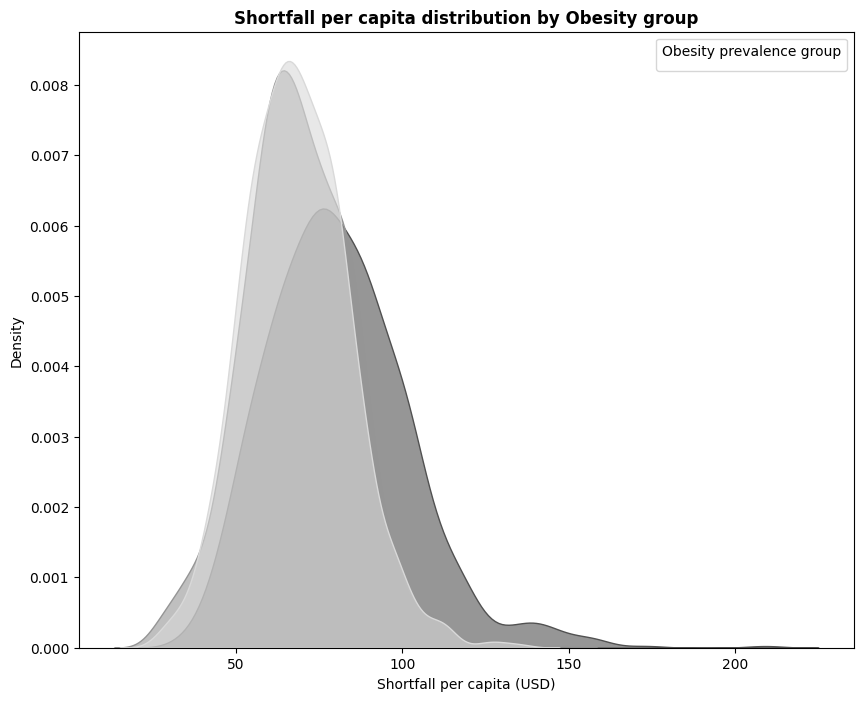

In [65]:
plt.figure(figsize=(10, 8))
sns.kdeplot(
    data=df_test,
    x='shortfall_per_capita_avg_2010_2022',
    hue='Obesity_group',
    fill=True,
    alpha=0.6,
    palette="Greys"
)
plt.title('Shortfall per capita distribution by Obesity group', fontweight='bold')
plt.xlabel('Shortfall per capita (USD)')
plt.ylabel('Density')
plt.legend(title='Obesity prevalence group')
plt.show()

+ Confirm this with Hexbin plot

In [95]:
mmg_avg_places_with_census_data = mmg_avg_places_data.merge(
    census_additional_data_no_dup, 
    on='fips', 
    how='left')

In [96]:
mmg_avg_places_with_census_data.head()

,fips,state_name,county_name,shortfall_avg_2010_2022,food_insecurity_rate_avg_2010_2022,cost_per_meal_avg_2010_2022,shortfall_per_capita_avg_2010_2022,num_food_insecure_avg_2010_2022,child_fi_rate_avg_2010_2022,per_less_low_threshold_fi_avg_2010_2022,...,population_avg_2010_2018,diabetes_prevalence,obesity_prevalence,estimate_total_households,median_inc_standardized,percent_families_wo_employment,per_hs_grad,per_col_grad,percent_white_only,percent_over65
0,01001,al,autauga county,4.289209e+06,0.139917,3.162223,77.117362,7753.333333,0.195583,0.446333,...,5.538911e+06,0.113,0.384,22308,0.297448,17.9,90.4,29.6,74.4,15.6
1,01003,al,baldwin county,1.607862e+07,0.130538,3.479203,78.953495,26247.692308,0.190385,0.436385,...,2.011643e+07,0.102,0.368,90802,0.459397,20.3,91.6,32.6,84.0,21.2
2,01005,al,barbour county,3.052385e+06,0.216923,3.095625,115.660750,5741.538462,0.298154,0.571154,...,2.639780e+06,0.160,0.438,9016,-1.403081,26.2,76.5,11.9,45.5,19.8
3,01007,al,bibb county,1.894395e+06,0.159615,3.013433,83.837650,3608.461538,0.235000,0.500538,...,2.261172e+06,0.133,0.414,7216,-0.751657,22.5,78.9,10.9,75.8,16.8
4,01009,al,blount county,3.901295e+06,0.128308,2.997825,67.466397,7409.230769,0.204154,0.533154,...,5.768646e+06,0.116,0.373,21626,-0.349102,20.1,81.8,14.7,91.3,18.3


In [97]:
mmg_avg_places_with_census_data.columns

Index(['fips', 'state_name', 'county_name', 'shortfall_avg_2010_2022',
       'food_insecurity_rate_avg_2010_2022', 'cost_per_meal_avg_2010_2022',
       'shortfall_per_capita_avg_2010_2022', 'num_food_insecure_avg_2010_2022',
       'child_fi_rate_avg_2010_2022',
       'per_less_low_threshold_fi_avg_2010_2022',
       'per_above_hight_threshold_fi_avg_2010_2022',
       'population_avg_2010_2018', 'diabetes_prevalence', 'obesity_prevalence',
       'estimate_total_households', 'median_inc_standardized',
       'percent_families_wo_employment', 'per_hs_grad', 'per_col_grad',
       'percent_white_only', 'percent_over65'],
      dtype='object')

In [100]:
from scipy.interpolate import griddata

In [101]:
def create_hexbin_plots(df, y_outcome, x_factors):
    x_col_1, x_col_2 = x_factors
    use_cols = [y_outcome, x_col_1, x_col_2]
    plot_df = df[use_cols].copy().dropna()
    #Define the variables 
    X = plot_df[x_col_1]
    Y = plot_df[x_col_2]
    Z = plot_df[y_outcome]
    # Grid of points to interpolate the data
    xi = np.linspace(X.min(), X.max(), 100)
    yi = np.linspace(Y.min(), Y.max(), 100)
    XI, YI = np.meshgrid(xi, yi)
    #Interpolate 
    ZI = griddata((X, Y), Z, (XI, YI), method='cubic')    
    #Create plot 
    plt.figure(figsize=(8, 6))
    CS = plt.contourf(XI, YI, ZI, levels=20, cmap='viridis_r') 
    plt.colorbar(CS, label= y_outcome)
    plt.scatter(X, Y, marker='.', c='gray', alpha=0.1)
    
    plt.xlabel(x_col_1)
    plt.ylabel(x_col_2)
    plt.title(f'Combined socioeconomic effect on {y_outcome}')
    plt.show()

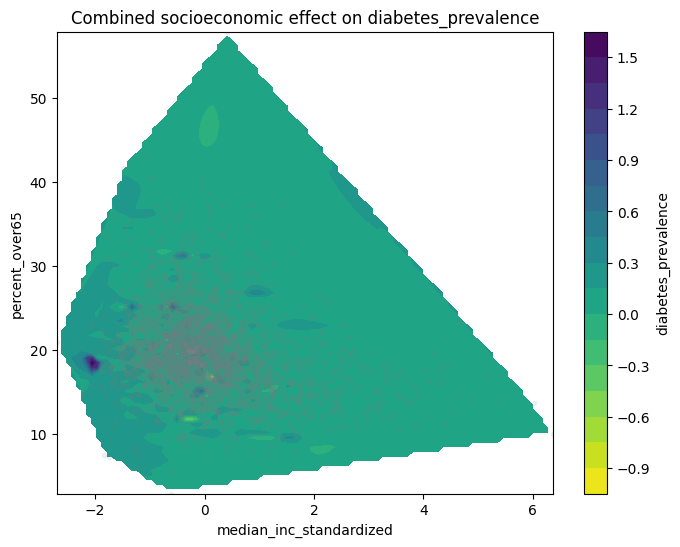

In [102]:
create_hexbin_plots(mmg_avg_places_with_census_data, 'diabetes_prevalence', ['median_inc_standardized','percent_over65'])

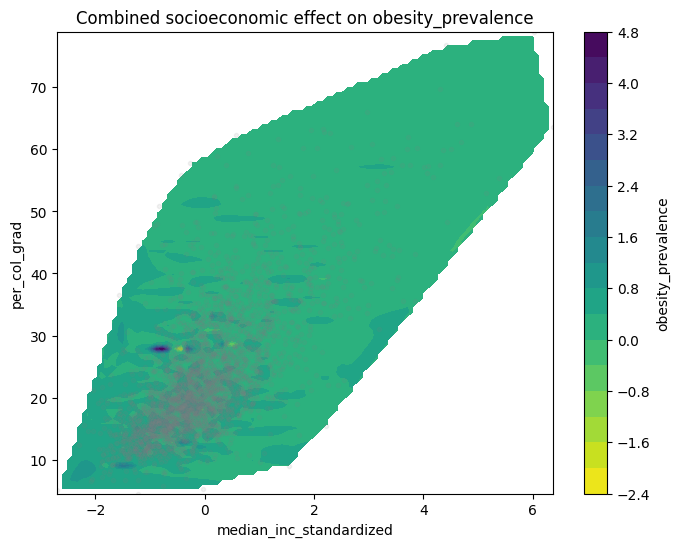

In [104]:
create_hexbin_plots(mmg_avg_places_with_census_data, 'obesity_prevalence', ['median_inc_standardized','per_col_grad'])

## Predictive analysis

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [120]:
def run_prediction_model(df, target_var):
    features = [
        "shortfall_per_capita_avg_2010_2022",
        "median_inc_standardized",
        "percent_white_only",
        "percent_over65",
        "per_col_grad",
    ]
    df_clean = df[features + [target_var]].dropna()
    #Define X and Y 
    X = df_clean[features].copy()
    y = df_clean[target_var].copy()

    #Split train and test dataset 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    #Standardize
    scaler = StandardScaler() 
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    #Model training 
    kf = KFold(n_splits=5, shuffle=True)
    ## Ridge training 
    ridge_model = Ridge(alpha=1.0)
    ridge_cv_scores = cross_val_score(ridge_model, X_train_scaled, y_train, cv=kf, scoring='r2')
    ridge_model.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_model.predict(X_test_scaled)
    
    #Lasso training 
    lasso_model = Lasso(alpha=0.001, max_iter=1000) 
    lasso_cv_scores = cross_val_score(lasso_model, X_train_scaled, y_train, cv=kf, scoring='r2')
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)

    #Evaluating 
    metrics = {
            # Test Set Metrics
            'Ridge_Test_R2': r2_score(y_test, y_pred_ridge),
            'Ridge_Test_RMSE': np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
            'Lasso_Test_R2': r2_score(y_test, y_pred_lasso),
            'Lasso_Test_RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
            
            # CV Training Set Metrics
            'Ridge_CV_R2_Mean': ridge_cv_scores.mean(),
            'Ridge_CV_R2_Std': ridge_cv_scores.std(),
            'Lasso_CV_R2_Mean': lasso_cv_scores.mean(),
            'Lasso_CV_R2_Std': lasso_cv_scores.std(),
        }
    #Examine coefs 
    lasso_coeffs = pd.Series(lasso_model.coef_, index=features)
    print(lasso_coeffs.sort_values(ascending=False))
    
    return metrics

In [121]:
run_prediction_model(mmg_avg_places_with_census_data, 'diabetes_prevalence')

shortfall_per_capita_avg_2010_2022    0.002539
percent_over65                       -0.003289
per_col_grad                         -0.006348
median_inc_standardized              -0.006736
percent_white_only                   -0.009186
dtype: float64


{'Ridge_Test_R2': 0.7210730070271587,
 'Ridge_Test_RMSE': 0.012289693938277708,
 'Lasso_Test_R2': 0.7143744303573398,
 'Lasso_Test_RMSE': 0.012436390110309467,
 'Ridge_CV_R2_Mean': 0.7067926232693479,
 'Ridge_CV_R2_Std': 0.017724366557725715,
 'Lasso_CV_R2_Mean': 0.7035052204807656,
 'Lasso_CV_R2_Std': 0.023065689963091825}

In [122]:
run_prediction_model(mmg_avg_places_with_census_data, 'obesity_prevalence')

shortfall_per_capita_avg_2010_2022   -0.002415
percent_white_only                   -0.005517
percent_over65                       -0.007393
median_inc_standardized              -0.015512
per_col_grad                         -0.020831
dtype: float64


{'Ridge_Test_R2': 0.49062901980073303,
 'Ridge_Test_RMSE': 0.03216746607374291,
 'Lasso_Test_R2': 0.4880571364228562,
 'Lasso_Test_RMSE': 0.032248572779213586,
 'Ridge_CV_R2_Mean': 0.5429670934222047,
 'Ridge_CV_R2_Std': 0.022139529055796314,
 'Lasso_CV_R2_Mean': 0.5362722300429452,
 'Lasso_CV_R2_Std': 0.024057793224824046}

+ Check with Julia about random forest 
+ Different alpha values - new task 
+ Now actually start to work on the powerpoint lol
+ Thinking of questions that people might ask 

In [126]:
## Bring more alpha values
from sklearn.model_selection import GridSearchCV

In [137]:
def run_prediction_model_with_multi_alphas(df, target_var):
    features = [
        "shortfall_per_capita_avg_2010_2022",
        "median_inc_standardized",
        "percent_white_only",
        "percent_over65",
        "per_col_grad",
    ]
    # Drop NA values
    df_clean = df[features + [target_var]].dropna()  
    
    X = df_clean[features].copy()
    y = df_clean[target_var].copy()
    # Split train and test dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

    # Standardize features
    scaler = StandardScaler() 
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #Define alpha values 
    alpha_ridge ={'alpha':[0.001,0.01, 0.1, 1.0, 10.0]}
    alpha_lasso = {'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01]}
    
    #Ridge CV to find the best alpha value
    ridge_search = GridSearchCV(
        Ridge(random_state=123),
        alpha_ridge,
        scoring="r2",
        cv=5
    )
    ridge_search.fit(X_train_scaled, y_train)
    ridge_best_alpha = ridge_search.best_params_["alpha"]
    
    #Lasso CV to find the best alpha value
    lasso_search = GridSearchCV(
            Lasso(max_iter=10000, random_state=42),
            alpha_lasso,
            scoring="r2",
            cv=5
        )
    lasso_search.fit(X_train_scaled, y_train)
    lasso_best_alpha = lasso_search.best_params_["alpha"]

    # Train model with the best alpha values
    ridge_best = Ridge(alpha=ridge_best_alpha)
    lasso_best = Lasso(alpha=lasso_best_alpha, max_iter=10000)
    
    ## Fit the model 
    ridge_best.fit(X_train_scaled, y_train)
    lasso_best.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred_ridge = ridge_best.predict(X_test_scaled)
    y_pred_lasso = lasso_best.predict(X_test_scaled)
    lasso_coeffs = pd.Series(lasso_best.coef_, index=features)

    metrics = {
    "ridge_alpha": ridge_best_alpha,
    "lasso_alpha": lasso_best_alpha,

    "ridge_test_r2": r2_score(y_test, y_pred_ridge),
    "ridge_test_rmse": np.sqrt(mean_squared_error(y_test, y_pred_ridge)),

    "lasso_test_r2": r2_score(y_test, y_pred_lasso),
    "lasso_test_rmse": np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
}
    return metrics, lasso_coeffs 

In [155]:
#Diabetes prevalance
overall_metrics_diabetes, coefs_lasso_diabetes = run_prediction_model_with_multi_alphas(mmg_avg_places_with_census_data, 'diabetes_prevalence')

In [151]:
import pprint

In [156]:
pprint.pprint(overall_metrics_diabetes)

{'lasso_alpha': 0.0001,
 'lasso_test_r2': 0.6481302164656841,
 'lasso_test_rmse': 0.013280593645770547,
 'ridge_alpha': 10.0,
 'ridge_test_r2': 0.6479056875765057,
 'ridge_test_rmse': 0.013284830158174516}


**Observations**
+ Both model relativeively explain partially amount of the variance in diabetes prevalance. Test $R^2$ for ridge and lasso are $0.6479$ and $0.6481$ respectively. This means that the features we chose are strong indicators regardless of the penalty regularization method. 
+ Both have low RMSE. On average, the model's prediction for a county's diabetes prevalence is off by about $1.33%$.
+ Best alpha value for ridge regression model is $10.0$ whereas best alpha value for Lasso regression model is $0.0001$. Ridge requires a laarger penalty than Lasso to achieve best score. The extremely small value for Lasso just confirms that none of the features we chose are truly redundant. It also confirms that the model behave like OLS model but with some shrinkage to do some effective features selection. 

In [157]:
print("Optimized Lasso coefficients for diabetes prevalance")
pprint.pprint(coefs_lasso_diabetes)

Optimized Lasso coefficients for diabetes prevalance
shortfall_per_capita_avg_2010_2022    0.002799
median_inc_standardized              -0.007293
percent_white_only                   -0.009935
percent_over65                       -0.004079
per_col_grad                         -0.006937
dtype: float64


+ The $\text{percent\_white\_only}$ feature is the most important, followed by $\text{median\_inc\_standardized}$ and $\text{per\_col\_grad}$. $\text{shortfall\_per\_capita\_avg\_2010\_2022}$ is a positive factor but the weakest predictor in the model.
+ The vast majority of the variance in disease prevalence is explained by socioeconomic factors ($\text{Income}$, $\text{Education}$, $\text{Race}$), while the food insecurity measure ($\text{shortfall per capita}$) provides a smaller, independent contribution to the risk. Becasue the Lasso model didn't set the coeffiecent to zero, it's fair to say ($\text{shortfall per capita}$) still provide predictive information that Income or Education alone cannot capture. 

In [158]:
#Obesity prevalance
overall_metrics_obesity, coefs_lasso_obesity = run_prediction_model_with_multi_alphas(mmg_avg_places_with_census_data, 'obesity_prevalence')

In [159]:
pprint.pprint(overall_metrics_obesity)

{'lasso_alpha': 0.0001,
 'lasso_test_r2': 0.5284708508392929,
 'lasso_test_rmse': 0.03013617473323635,
 'ridge_alpha': 10.0,
 'ridge_test_r2': 0.528668517171728,
 'ridge_test_rmse': 0.03012985748692968}


In [160]:
print("Optimized Lasso coefficients for diabetes prevalance")
pprint.pprint(coefs_lasso_obesity)

Optimized Lasso coefficients for diabetes prevalance
shortfall_per_capita_avg_2010_2022   -0.006322
median_inc_standardized              -0.018381
percent_white_only                   -0.008087
percent_over65                       -0.007837
per_col_grad                         -0.020650
dtype: float64


**Observation**
+ Education becoming the single strongest predictor.
+ Increase in the $\text{shortfall\_per\_capita}$ is associated with decrease in $\text{obesity\_prevalence}$. So after all, the economic stress associated with severe food insecurity might lead to less calorie consumption overall.
+ Contrast with with the Diabetes model. 